# Imorting all Necessary Modele

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/jaysi/Downloads/Malaria Detection/cell_images/train'
valid_path = 'C:/Users/jaysi/Downloads/Malaria Detection/cell_images/test'

In [3]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('C:/Users/jaysi/Downloads/Malaria Detection/cell_images/train/*')

In [6]:
folders

['C:/Users/jaysi/Downloads/Malaria Detection/cell_images/train\\Parasitized',
 'C:/Users/jaysi/Downloads/Malaria Detection/cell_images/train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/jaysi/Downloads/Malaria Detection/cell_images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 23082 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('C:/Users/jaysi/Downloads/Malaria Detection/cell_images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4476 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=100,
  validation_steps=100
)

C:\Users\jaysi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 65s 647ms/step - loss: 1.2709 - accuracy: 0.5138 - val_loss: 0.6921 - val_accuracy: 0.5034
Epoch 2/20
100/100 [==============================] - 65s 652ms/step - loss: 0.6804 - accuracy: 0.5589 - val_loss: 0.6732 - val_accuracy: 0.5688
Epoch 3/20
100/100 [==============================] - 69s 689ms/step - loss: 0.6678 - accuracy: 0.5925 - val_loss: 0.6638 - val_accuracy: 0.6191
Epoch 4/20
100/100 [==============================] - 75s 752ms/step - loss: 0.6251 - accuracy: 0.6497 - val_loss: 0.5896 - val_accuracy: 0.6778
Epoch 5/20
100/100 [==============================] - 77s 774ms/step - loss: 0.5342 - accuracy: 0.7714 - val_loss: 0.4403 - val_accuracy: 0.7978
Epoch 6/20
100/100 [==============================] - 77s 769ms/step - loss: 0.3917 - accuracy: 0.8478 - val_loss: 0.3006 - val_accuracy: 0.8934
Epoch 7/20
100/100 [==============================] - 77s 773ms/step - loss: 0.3600 - accuracy: 0.8964 - val_loss: 0.2540 - val_ac

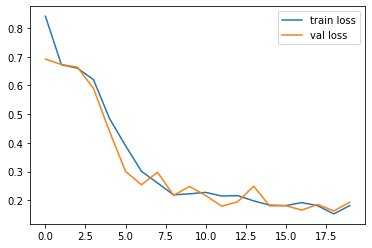

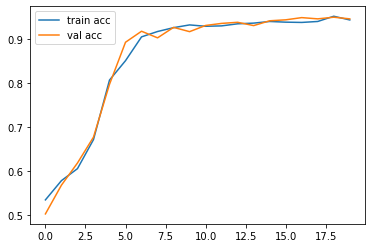

<Figure size 432x288 with 0 Axes>

In [18]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[0.00165756, 0.9983424 ],
       [0.0143035 , 0.98569643],
       [0.01972016, 0.9802798 ],
       ...,
       [0.00598091, 0.99401915],
       [0.00482297, 0.99517703],
       [0.9958643 , 0.0041357 ]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [26]:
img=image.load_img('C:/Users/jaysi/Downloads/Malaria Detection/cell_images/test/Uninfected/C147P108ThinF_IMG_20151115_101317_cell_2.png',target_size=(224,224))